In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [2]:
class MeanRegressor(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.mean_ = y.mean()
        return self
    
    def predict(self, X):
        return np.array(X.shape[0]*[self.mean_])

In [3]:
X, y = load_boston(return_X_y=True)

l = MeanRegressor()
l.fit(X, y)

MeanRegressor()

In [4]:
l.score(X, y)

0.0

In [5]:
class ConstantRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, c=None):
        self.c = c
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        if self.c is None:
            self.const_ = y.mean()
        else:
            self.const_ = self.c
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return np.array(X.shape[0]*[self.const_])

In [6]:
grid = GridSearchCV(
    estimator=ConstantRegressor(),
    param_grid={
        'c': np.linspace(0, 50, 100)
    },
)

grid.fit(X, y)

GridSearchCV(estimator=ConstantRegressor(),
             param_grid={'c': array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626263, 13...
       35.35353535, 35.85858586, 36.36363636, 36.86868687, 37.37373737,
       37.87878788, 38.38383838, 38.88888889, 39.39393939, 39.8989899 ,
       40.4040404 , 40.90909091, 41.41414141, 41.91919192, 42.42424242,
       42.92929293, 43.43434343, 43.93939394, 44.44444444, 44.94949495,
       45.45454545, 45.95959596, 46.46464646, 46.96969697, 47.47474747,
       47.97979798, 48.48484848, 48.98989899, 49.49494949, 50.        ])})

In [7]:
grid.best_params_

{'c': 20.70707070707071}

In [8]:
class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [9]:
X, y = load_boston(return_X_y=True)

In [10]:
l = LADRegression()
l.fit(X, y)
l.score(X, y)

0.7085263404601561

In [11]:
l2 = LinearRegression()
l2.fit(X, y)
l2.score(X, y)

0.7406426641094095

In [12]:
X = np.random.randn(20)
y = 3*X - 2 + 8*np.random.randn(20)
y[:3] = 100

In [13]:
l = LADRegression()
l.fit(X.reshape(-1,1), y)

l2 = LinearRegression()
l2.fit(X.reshape(-1,1), y)

LinearRegression()

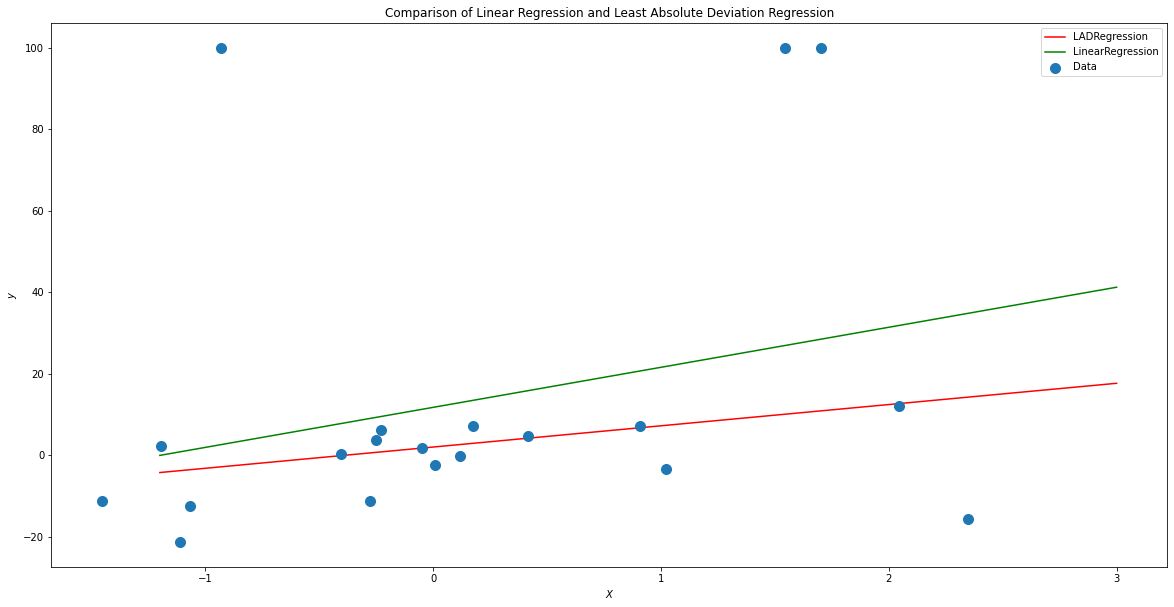

In [14]:
plt.figure(figsize=(20, 10))


t = np.linspace(-1.2, 3, 10)
plt.scatter(X, y, label='Data', zorder=10, s=100)
plt.plot(t, l.coef_*t + l.intercept_, 'r', label='LADRegression')
plt.plot(t, l2.coef_*t + l2.intercept_, 'g', label='LinearRegression')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.title('Comparison of Linear Regression and Least Absolute Deviation Regression')

plt.legend()